In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification


In [4]:
x,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [5]:
x

array([[ 0.7484175 , -2.54773869],
       [-1.29756903,  1.1269892 ],
       [ 1.63292333, -0.71936506],
       ...,
       [ 1.66650072,  1.96694035],
       [ 1.80644844,  0.43269897],
       [ 1.65778039,  1.82865744]])

In [6]:
y

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,

In [17]:
pd.DataFrame(x)[0]

0      0.748417
1     -1.297569
2      1.632923
3      2.225856
4      0.993455
         ...   
995    0.746120
996   -1.378015
997    1.666501
998    1.806448
999    1.657780
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

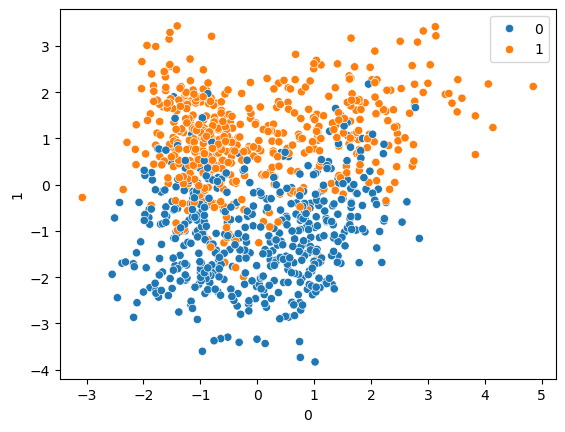

In [24]:
import matplotlib.pyplot as plt
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')

In [29]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [30]:
svc.coef_#2 slopes

array([[-0.13527329,  1.40874759]])

In [31]:
y_pred=svc.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_pred,y_test))

[[79 12]
 [20 89]]


In [33]:
print(accuracy_score(y_pred,y_test))

0.84


In [35]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        91
           1       0.88      0.82      0.85       109

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [37]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['linear']}
cv=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)
cv.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.887 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.894 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.838 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.844 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.831 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.887 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.894 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.838 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.844 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.831 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.887 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [38]:
y_pred=cv.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[80 12]
 [19 89]]
0.845


## Support Vector Regressor

ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features

<Axes: xlabel='0', ylabel='1'>

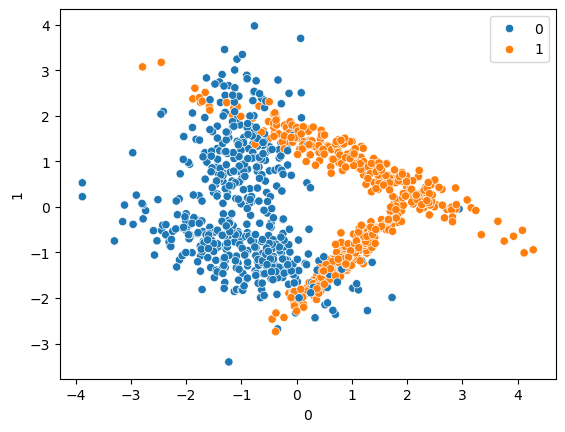

In [15]:
import matplotlib.pyplot as plt
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [18]:
svr.coef_

array([[0.32432384, 0.00692526]])

In [19]:
y_pred=svr.predict(x_test)

In [20]:
from sklearn.metrics import r2_score
print(r2_score(y_pred,y_test))

0.4724793005846435


## SVM kernels

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [2]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

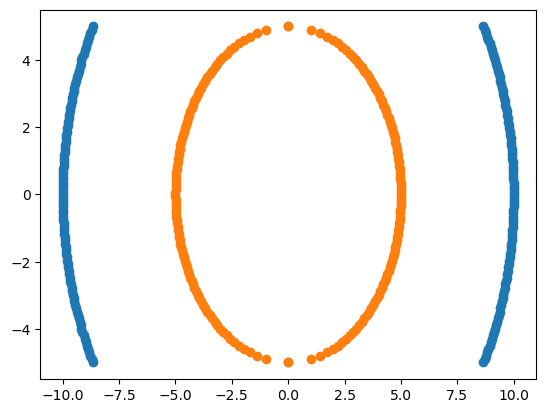

In [3]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [14]:
import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = df1+df2
df.head(5)

,X1,X2,Y
0,0.000000,-10.000000,1
1,0.999949,-9.797980,1
2,1.406908,-9.595960,1
3,1.714198,-9.393939,1
4,1.969049,-9.191919,1


In [15]:
df.shape

(200, 3)

## Polynomial Kernel

In [16]:
df['X1_Square']=df['X1']**2
df['X2_Square']=df['X2']**2
df['X1*X2']=df['X1']*df['X2']
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,0.000000,-10.000000,1,0.000000,100.000000,-0.000000
1,0.999949,-9.797980,1,0.999898,96.000408,-9.797480
2,1.406908,-9.595960,1,1.979390,92.082441,-13.500631
3,1.714198,-9.393939,1,2.938476,88.246097,-16.103075
4,1.969049,-9.191919,1,3.877155,84.491378,-18.099343


In [17]:
### Independent and Dependent features
X = df[['X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)

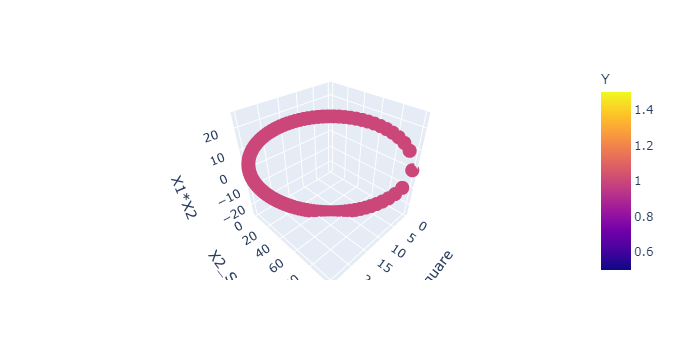

In [32]:
import plotly.express as px
import plotly.express as px
fig = px.scatter_3d(df, x='X1_Square', y='X2_Square', z='X1*X2',
              color='Y')
fig.show()
plt.show()

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

ValueError: The number of classes has to be greater than one; got 1 class

In [34]:
y_train

79     1
197    1
38     1
24     1
122    1
      ..
106    1
14     1
92     1
179    1
102    1
Name: Y, Length: 160, dtype: int64

In [30]:
y_train.nunique()

1